opening /home/bdetweiler/src/Data_Science/math-8756-final-project/db/scotch_prices.db


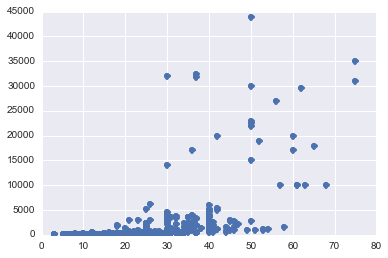

In [69]:
%matplotlib inline
import pprint
from pprint import pprint
import re
import os
from os import listdir
from os.path import isfile, join, walk
import csv
from storm.locals import *
import sqlite3
from collections import Counter
from matplotlib import pyplot as plt
import math
import statistics
import numpy as np
import pandas as pd
import seaborn as sns
import statistics
from statistics import mean, stdev
from scipy.stats import t
from scipy import stats


import numpy as np
import matplotlib.pyplot as plt
import plotly.plotly as py


class Retailer(object):
    __storm_table__ = "RETAILER"
    RETAILER_ID = Int(primary=True)
    NAME = Unicode()
    TYPE = Unicode()
    CITY = Unicode()
    STATE = Unicode()
    COUNTRY = Unicode()
    SHIPPING_COST = Float()
    ADDITIONAL_COST = Float()
    
      
    def __init__(self, name, retailer_type, city, state, country, shipping_cost, additional_cost):
        # self.RETAILER_ID = int(retailer_id)
        self.NAME = u'' + name
        self.TYPE = u'' + retailer_type
        self.CITY = u'' + city
        self.STATE = u'' + state
        self.COUNTRY = u'' + country
        self.SHIPPING_COST = float(shipping_cost)
        self.ADDITIONAL_COST = float(additional_cost)

    def __str__(self):
        return 'Retailer[ RETAILER_ID = ' + str(self.RETAILER_ID) + ', NAME = ' + self.NAME + ', TYPE = ' + self.TYPE + ', CITY = ' + self.CITY + ', STATE = ' + self.STATE + ', COUNTRY = ' + self.COUNTRY + ', SHIPPING_COST = ' + str(self.SHIPPING_COST) + ', ADDITIONAL_COST = ' +  str(self.ADDITIONAL_COST) + ']'

    
class Distillery(object):
    __storm_table__ = "DISTILLERY"
    DISTILLERY_ID = Int(primary=True)
    NAME = Unicode()
    REGION = Unicode()
      
    def __init__(self, name, region):
        # self.DISTILLERY_ID = int(distillery_id)
        self.NAME = u'' + name
        self.REGION = u'' + region

    def __str__(self):
        return 'Distillery[ DISTILLERY_ID = ' + str(self.DISTILLERY_ID) + ', NAME = ' + self.NAME + ', REGION = ' + self.REGION + ']'

    
class Producer(object):
    __storm_table__ = "PRODUCER"
    PRODUCER_ID = Int(primary=True)
    NAME = Unicode()
      
    def __init__(self, name):
        # self.PRODUCER_ID = int(producer_id)
        self.NAME = u'' + name

    def __str__(self):
        return 'Producer[ PRODUCER_ID = ' + str(self.PRODUCER_ID) + ', NAME = ' + self.NAME + ']'

    
class Scotch(object):
    __storm_table__ = "SCOTCH"
    SCOTCH_ID = Int(primary=True)
    PRODUCER = Int()
    DISTILLERY = Int()
    NAME = Unicode()
    AGE = Int()
    
    def __init__(self, producer, distillery, name, age):
        # self.SCOTCH_ID = int(scotch_id)
        self.PRODUCER = int(producer)
        self.DISTILLERY = int(distillery)
        self.NAME = u'' + name
        self.AGE = int(age)

    def __str__(self):
        return 'Scotch[ SCOTCH_ID = ' + str(self.SCOTCH_ID) + ', PRODUCER = ' + str(self.PRODUCER) + ', DISTILLERY = ' + str(self.DISTILLERY) + ', NAME = ' + self.NAME + ', AGE = ' + str(self.AGE) + ']'

class Price(object):
    __storm_table__ = "PRICE"
    PRICE_ID = Int(primary=True)
    RETAILER = Int()
    SCOTCH = Int()
    PRICE = Float()
    
    def __init__(self, retailer, scotch, price):
        # self.SCOTCH_ID = int(scotch_id)
        self.RETAILER = int(retailer)
        self.SCOTCH = int(scotch)
        self.PRICE = float(price)

    def __str__(self):
        return 'Price[ PRICE_ID = ' + str(self.PRICE_ID) + ', RETAILER = ' + str(self.RETAILER) + ', SCOTCH = ' + str(self.SCOTCH) + ', PRICE = ' + str(self.PRICE) + ']'
    

MATH_8756_HOME = os.environ.get('MATH_8756_HOME')
DB_DIR = MATH_8756_HOME + '/' + 'db'
DB = DB_DIR + '/scotch_prices.db'

# This is what we're trying to populate

print 'opening ' + DB
# conn = sqlite3.connect(DB)
scotch_db = create_database('sqlite:' + DB)
scotch_store = Store(scotch_db)

#scotch_join = [(Scotch, Price), Price.SCOTCH == Scotch.SCOTCH_ID]
#scotch_rs = scotch_store.using(*scotch_join).find(Scotch, Scotch.AGE > 0).order_by(Price.PRICE)

scotch_rs = scotch_store.find((Scotch, Price, Producer, Distillery, Retailer),
                     Price.SCOTCH == Scotch.SCOTCH_ID,
                     Price.RETAILER == Retailer.RETAILER_ID,
                     Producer.PRODUCER_ID == Scotch.PRODUCER,
                     Distillery.DISTILLERY_ID == Scotch.DISTILLERY,
                     Scotch.AGE > 0).order_by(Price.PRICE)
data = [(producer.NAME, distillery.NAME, scotch.AGE, price.PRICE, retailer.NAME) for scotch, price, producer, distillery, retailer in scotch_rs]

age = []
price = []
for i in range(0, len(data)):
    age.append(data[i][2])
    price.append(data[i][3])
    #print str(data[i][2]) + ", " + str(data[i][3])


plt.plot(age, price, "o")





    
scotch_store.flush()
scotch_store.commit()
scotch_store.close()

# Outliers

When correlating age to price, we can see a pretty tight clustering in the sub-thousand dollar range in the 0-40 range, and tapering off a bit in the 50s. But the outliers really start around the 30 year range. This is where we see our shining stars, dollar-wise.

opening /home/bdetweiler/src/Data_Science/math-8756-final-project/db/scotch_prices.db


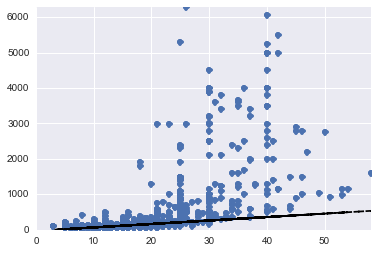

In [70]:

MATH_8756_HOME = os.environ.get('MATH_8756_HOME')
DB_DIR = MATH_8756_HOME + '/' + 'db'
DB = DB_DIR + '/scotch_prices.db'

# This is what we're trying to populate

print 'opening ' + DB
# conn = sqlite3.connect(DB)
scotch_db = create_database('sqlite:' + DB)
scotch_store = Store(scotch_db)

#scotch_join = [(Scotch, Price), Price.SCOTCH == Scotch.SCOTCH_ID]
#scotch_rs = scotch_store.using(*scotch_join).find(Scotch, Scotch.AGE > 0).order_by(Price.PRICE)


scotch_rs = scotch_store.find((Scotch, Price, Producer, Distillery, Retailer),
                     Price.SCOTCH == Scotch.SCOTCH_ID,
                     Price.RETAILER == Retailer.RETAILER_ID,
                     Producer.PRODUCER_ID == Scotch.PRODUCER,
                     Distillery.DISTILLERY_ID == Scotch.DISTILLERY,
                     Scotch.AGE > 0,
                     Price.PRICE < 9000).order_by(Price.PRICE)
data = [(producer.NAME, distillery.NAME, scotch.AGE, price.PRICE, retailer.NAME) for scotch, price, producer, distillery, retailer in scotch_rs]

age = []
price = []
for i in range(0, len(data)):
    age.append(data[i][2])
    price.append(data[i][3])
    #print str(data[i][2]) + ", " + str(data[i][3])

    
plt.plot(age, price, 'o', age, fit_fn(age), '--k')
plt.xlim(0, max(age))
plt.ylim(0, max(price))




    
scotch_store.flush()
scotch_store.commit()
scotch_store.close()

# Tightening the Range

If we restrict our dollar value to under \$10,000, we start to see a clear pattern emerge.

opening /home/bdetweiler/src/Data_Science/math-8756-final-project/db/scotch_prices.db


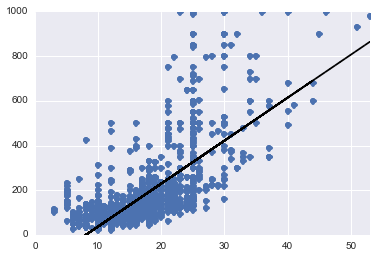

In [71]:

MATH_8756_HOME = os.environ.get('MATH_8756_HOME')
DB_DIR = MATH_8756_HOME + '/' + 'db'
DB = DB_DIR + '/scotch_prices.db'

# This is what we're trying to populate

print 'opening ' + DB
# conn = sqlite3.connect(DB)
scotch_db = create_database('sqlite:' + DB)
scotch_store = Store(scotch_db)

#scotch_join = [(Scotch, Price), Price.SCOTCH == Scotch.SCOTCH_ID]
#scotch_rs = scotch_store.using(*scotch_join).find(Scotch, Scotch.AGE > 0).order_by(Price.PRICE)


scotch_rs = scotch_store.find((Scotch, Price, Producer, Distillery, Retailer),
                     Price.SCOTCH == Scotch.SCOTCH_ID,
                     Price.RETAILER == Retailer.RETAILER_ID,
                     Producer.PRODUCER_ID == Scotch.PRODUCER,
                     Distillery.DISTILLERY_ID == Scotch.DISTILLERY,
                     Scotch.AGE > 0,
                     Price.PRICE < 1001).order_by(Price.PRICE)
data = [(producer.NAME, distillery.NAME, scotch.AGE, price.PRICE, retailer.NAME) for scotch, price, producer, distillery, retailer in scotch_rs]

age = []
price = []
for i in range(0, len(data)):
    age.append(data[i][2])
    price.append(data[i][3])
    #print str(data[i][2]) + ", " + str(data[i][3])

    
fit = np.polyfit(age, price, 1)
fit_fn = np.poly1d(fit) 
# fit_fn is now a function which takes in x and returns an estimate for y

# plt.plot(x,y, 'yo', x, fit_fn(x), '--k')
    
plt.plot(age, price, 'o', age, fit_fn(age), '--k')
plt.xlim(0, max(age))
plt.ylim(0, max(price))


    
scotch_store.flush()
scotch_store.commit()
scotch_store.close()

opening /home/bdetweiler/src/Data_Science/math-8756-final-project/db/scotch_prices.db


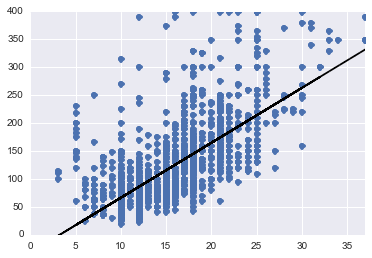

In [72]:

MATH_8756_HOME = os.environ.get('MATH_8756_HOME')
DB_DIR = MATH_8756_HOME + '/' + 'db'
DB = DB_DIR + '/scotch_prices.db'

# This is what we're trying to populate

print 'opening ' + DB
# conn = sqlite3.connect(DB)
scotch_db = create_database('sqlite:' + DB)
scotch_store = Store(scotch_db)

#scotch_join = [(Scotch, Price), Price.SCOTCH == Scotch.SCOTCH_ID]
#scotch_rs = scotch_store.using(*scotch_join).find(Scotch, Scotch.AGE > 0).order_by(Price.PRICE)


scotch_rs = scotch_store.find((Scotch, Price, Producer, Distillery, Retailer),
                     Price.SCOTCH == Scotch.SCOTCH_ID,
                     Price.RETAILER == Retailer.RETAILER_ID,
                     Producer.PRODUCER_ID == Scotch.PRODUCER,
                     Distillery.DISTILLERY_ID == Scotch.DISTILLERY,
                     Scotch.AGE > 0,
                     Price.PRICE < 401).order_by(Price.PRICE)
data = [(producer.NAME, distillery.NAME, scotch.AGE, price.PRICE, retailer.NAME) for scotch, price, producer, distillery, retailer in scotch_rs]

age = []
price = []
for i in range(0, len(data)):
    age.append(data[i][2])
    price.append(data[i][3])
    #print str(data[i][2]) + ", " + str(data[i][3])

    
fit = np.polyfit(age, price, 1)
fit_fn = np.poly1d(fit) 
# fit_fn is now a function which takes in x and returns an estimate for y

# plt.plot(x,y, 'yo', x, fit_fn(x), '--k')
    
plt.plot(age, price, 'o', age, fit_fn(age), '--k')
plt.xlim(0, max(age))
plt.ylim(0, max(price))



    
scotch_store.flush()
scotch_store.commit()
scotch_store.close()

# Variance by Age

In [73]:

MATH_8756_HOME = os.environ.get('MATH_8756_HOME')
DB_DIR = MATH_8756_HOME + '/' + 'db'
DB = DB_DIR + '/scotch_prices.db'

# This is what we're trying to populate

print 'opening ' + DB
# conn = sqlite3.connect(DB)
scotch_db = create_database('sqlite:' + DB)
scotch_store = Store(scotch_db)

#scotch_join = [(Scotch, Price), Price.SCOTCH == Scotch.SCOTCH_ID]
#scotch_rs = scotch_store.using(*scotch_join).find(Scotch, Scotch.AGE > 0).order_by(Price.PRICE)

def StudentTCI(mu, sigma, df, alpha=0.95):
    return t.interval(alpha, df, mu, sigma)

for age in range(1, 80):
    print "Age: " + str(age)
    
    scotch_rs = scotch_store.find((Scotch, Price, Producer, Distillery, Retailer),
                         Price.SCOTCH == Scotch.SCOTCH_ID,
                         Price.RETAILER == Retailer.RETAILER_ID,
                         Producer.PRODUCER_ID == Scotch.PRODUCER,
                         Distillery.DISTILLERY_ID == Scotch.DISTILLERY,
                         Scotch.AGE == age).order_by(Price.PRICE)
    data = [(producer.NAME, distillery.NAME, scotch.AGE, price.PRICE, retailer.NAME) for scotch, price, producer, distillery, retailer in scotch_rs]

    
    price = []
    for i in range(0, len(data)):
        price.append(data[i][3])

    if (len(price) < 2):
        continue
        
    mu = mean(price)
    sigma = stdev(price)
    n = len(price)
    maxPrice = max(price)
    minPrice = min(price)
    
    print "n = " + str(n)
    print "mu = " + str(mu)
    print "sigma = " + str(sigma)
    print "max = " + str(maxPrice)
    print "min = " + str(minPrice)

    #Studnt, n=999, p<0.05, 2-tail
    #equivalent to Excel TINV(0.05,999)
    # print stats.t.ppf(1-0.025, n)
    
    print StudentTCI(mu, sigma, n)
    print StudentTCI(mu, sigma, n, 0.90)

    
scotch_store.flush()
scotch_store.commit()
scotch_store.close()

opening /home/bdetweiler/src/Data_Science/math-8756-final-project/db/scotch_prices.db
Age: 1
Age: 2
Age: 3
n = 3
mu = 108.31
sigma = 7.62018372482
max = 114.95
min = 99.99
(84.059174459361742, 132.56082554063826)
(90.376938255538406, 126.24306174446158)
Age: 4
Age: 5
n = 14
mu = 164.115
sigma = 44.6003716352
max = 229.95
min = 59.99
(68.456716640626112, 259.77328335937392)
(85.55991337955642, 242.67008662044358)
Age: 6
n = 9
mu = 70.3055555556
sigma = 24.7257715305
max = 99.99
min = 24.99
(14.371974383570013, 126.23913672754111)
(24.980423993183159, 115.63068711792795)
Age: 7
n = 20
mu = 84.082
sigma = 49.3034412806
max = 249.99
min = 37.95
(-18.763176335657974, 186.92717633565798)
(-0.95254461534922541, 169.1165446153492)
Age: 8
n = 30
mu = 84.3756666667
sigma = 73.0235045619
max = 425.0
min = 34.96
(-64.758225362744213, 233.50955869607753)
(-39.564271995537766, 208.31560532887102)
Age: 9
n = 10
mu = 95.382
sigma = 33.7608362192
max = 148.95
min = 29.99
(20.158169145090397, 170.605830